#### Machine Learning 1: SciKitLearn - Logistic Regression Model

In [1]:
import pandas as pd
import numpy as np
import sys
import random

from matplotlib import pyplot as plt
from statistics import mean, stdev

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install openpyxl
survey = pd.read_excel('Retention_Dataset_CLEAN.xlsx')
survey.shape

(941, 61)

In [3]:
survey.columns

Index(['Q4', 'Q6', 'Q7', 'Q8', 'Q9', 'Q21', 'Q20', 'Q21_1', 'Q21_2', 'Q21_3',
       'Q21_11', 'Q21_12', 'Q21_13', 'Q21_14', 'Q21_15', 'Q21_16', 'Q21_17',
       'Q23_2', 'Q23_3', 'Q23_1', 'Q23_4', 'Q22_1', 'Q22_2', 'Q22_3', 'Q22_4',
       'Q22_5', 'Q22_6', 'Q22_8', 'Q22_7', 'Q24_1', 'Q24_2', 'Q24_8', 'Q24_3',
       'Q24_7', 'Q24_4', 'Q24_5', 'Q24_6', 'Q25_4', 'Q25_5', 'Q25_6', 'Q25_7',
       'Q25_8', 'Q25_9', 'Spr_22_Ret', 'Fa_22_Ret',
       'Q27_American Indian or Alaska Native', 'Q27_Asian',
       'Q27_Black or African American', 'Q27_Other', 'Q27_White', 'Q29_Female',
       'Q29_Male', 'Q29_Non-binary / third gender', 'Q29_Prefer not to say',
       'Q30_No', 'Q30_Prefer not to say', 'Q30_Yes',
       'Q22_Off-Campus (with family)', 'Q22_Off-Campus (with friends etc.)',
       'Q22_On-Campus', 'Q22_Other'],
      dtype='object')

### Task 1: Create the training set & the result set

"just_data" will be the matrix of data that contains the survey data for each student.
"y_vals" will be the "matrix" of data that contains the retention result.

Both of these will then be converted into Numpy matrices that we will label "X" and "y."
Using these labels will allow us to reuse the code from the ML course with fewer changes.

In [4]:
data_columns = ['Q27_American Indian or Alaska Native', 'Q27_Asian',
       'Q27_Black or African American', 'Q27_Other', 'Q27_White', 'Q29_Female',
       'Q29_Male', 'Q29_Non-binary / third gender', 'Q29_Prefer not to say',
       'Q30_No', 'Q30_Prefer not to say', 'Q30_Yes',
       'Q22_Off-Campus (with family)', 'Q22_Off-Campus (with friends etc.)',
       'Q22_On-Campus', 'Q22_Other']

just_data = survey[data_columns]
print(just_data.shape)

y_vals = survey[['Fa_22_Ret']]
y_vals.shape

(941, 16)


(941, 1)

In [5]:
y_vals.value_counts()

Fa_22_Ret
1            714
0            227
dtype: int64

In [6]:
X = just_data.to_numpy()
y = y_vals.to_numpy()
y = y.ravel()

In [7]:
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0])

print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of X is:  [False False False False  True False  True False False  True False False
 False False  True False]
The first element of y is:  1
The shape of X is: (941, 16)
The shape of y is: (941,)


#### Split the Dataset
The following code with use scikitlearn to split out 60% of the data for training, 20% for cross-validation, and 20% for final testing

In [8]:
#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (470, 16) y_train.shape (470,)
X_test.shape (471, 16) y_test.shape (471,)


In [9]:
# Step 5: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_probs = model.predict_proba(X_test)[:, 1]

new_threshold = 0.79

y_pred = (y_pred_probs >= new_threshold).astype(int)
#print(y_pred)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=False)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.53
Confusion Matrix:
[[ 65  49]
 [171 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.57      0.37       114
           1       0.79      0.52      0.63       357

    accuracy                           0.53       471
   macro avg       0.53      0.55      0.50       471
weighted avg       0.67      0.53      0.57       471



In [10]:
print(type(conf_matrix))
fn = conf_matrix[1][0]
fp = conf_matrix[0][1]
print(fn, fp)

<class 'numpy.ndarray'>
171 49


In [11]:
new_threshold = 0.75

y_pred = (y_pred_probs >= new_threshold).astype(int)
print(y_pred)

[1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0]


In [12]:
def learn_me(threshold):
    # Step 5: Train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Step 6: Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_probs >= threshold).astype(int)

    # Step 7: Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    #classification_rep = classification_report(y_test, y_pred)
    
    return accuracy, conf_matrix, classification_rep

In [13]:
def iterate_me(bottom, top):
    results = []
    means = []
    recalls = []
    false_ns = []
    false_ps = []
    thresholds = []
    
    for threshold in range(bottom, top+1):
        thresholds.append(threshold/100)
        learning = learn_me((threshold/100))
        results.append(learning[0])
        current_mean = mean(results)
        means.append(current_mean)
        recalls.append(learning[2]['0']['recall'])
        false_ns.append((learning[1][1][0])/len(X_test))
        false_ps.append((learning[1][0][1])/len(X_test))
        
    data = {'Accuracy': results,
           'False Negatives': false_ns,
           'False Positives': false_ps,
           'Threshold': thresholds}
    df = pd.DataFrame(data)
    df.plot('Threshold', ['Accuracy', 'False Negatives', 'False Positives'], figsize=(12,6))
    #probability = plt.gca().lines[2].set_linewidth(3)
    #weighted = plt.gca().lines[1].set_linestyle('--')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy/Recall')
    plt.title('Predictive Accuracy for SciKitLearn Logistic Regression Model')
    #plt.legend(loc='lower left')
    plt.show()
    
    average = round((mean(results) * 100), 2)
    standard_dev = round(stdev(results), 2)
    
    #print(f'After {cycles}:')
    #print(f'Accuracy: {average}%   Standard Deviation: {standard_dev}')
    
    return learning

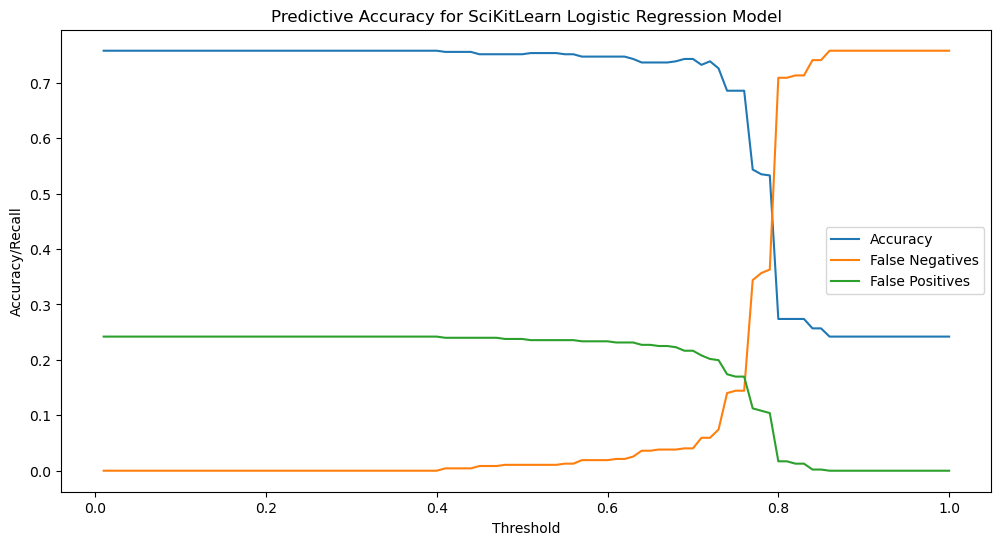

In [14]:
learning = iterate_me(1, 100)

In [15]:
accuracy = learning[0]
conf_matrix = learning[1]
classification_rep = learning[2]

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.24
Confusion Matrix:
[[114   0]
 [357   0]]
Classification Report:
{'0': {'precision': 0.24203821656050956, 'recall': 1.0, 'f1-score': 0.38974358974358975, 'support': 114}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 357}, 'accuracy': 0.24203821656050956, 'macro avg': {'precision': 0.12101910828025478, 'recall': 0.5, 'f1-score': 0.19487179487179487, 'support': 471}, 'weighted avg': {'precision': 0.05858249827579212, 'recall': 0.24203821656050956, 'f1-score': 0.09433284337742937, 'support': 471}}


## Summary:
- On the one hand, an accuracy rating of 75.16% seems pretty good...
- But that is suspiciously close to the 76% accuracy rate from just guessing "1" every time...
- And looking at the pool of incorrect predictions, we can see that this is essentially what happened:
 - 112 out of 117 wrong predictions were false positives
 - The model is basically just guessing "1" nearly every time.